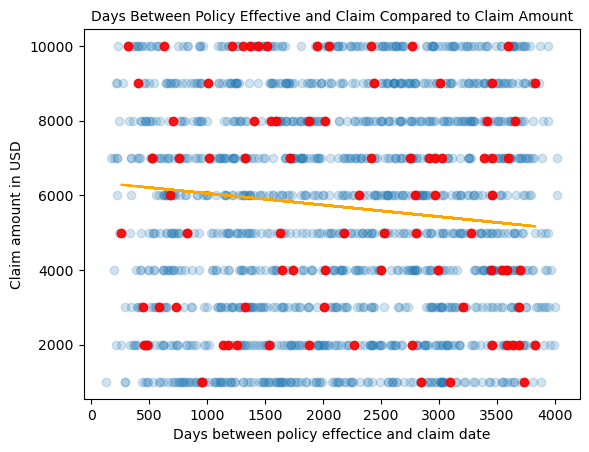

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


data=pd.read_csv('insurance_data.csv')
index=data['INSURANCE_TYPE']=='Motor'
data=data[index]
data=data[['POLICY_EFF_DT','REPORT_DT','CLAIM_AMOUNT']]
time=data[['POLICY_EFF_DT','REPORT_DT']]=data[['POLICY_EFF_DT','REPORT_DT']].applymap(np.array)

mark=0
for i in data.REPORT_DT:
    date=i
    year=date[:4]
    month=date[5:7]
    day=date[8:10]
    year=(int(year)-2000)*365
    month=int(month)*30
    day=int(day)
    i=year+month+day
    data.iloc[mark, 1] = i
    mark=mark+1
mark=0
for i in data.POLICY_EFF_DT:
    date=i
    year=date[:4]
    month=date[5:7]
    day=date[8:10]
    year=(int(year)-2000)*365
    month=int(month)*30
    day=int(day)
    i=year+month+day
    data.iloc[mark, 0] = i
    mark=mark+1
data['Days'] = data.REPORT_DT.sub(data.POLICY_EFF_DT)
data=data[['Days','CLAIM_AMOUNT']]



data2=pd.read_csv('insurance_data.csv')
index2=data2['INSURANCE_TYPE']=='Motor'
data2=data2[index2]
index2=data2['CLAIM_STATUS']=='D'
data2=data2[index2]
data2=data2[['POLICY_EFF_DT','REPORT_DT','CLAIM_AMOUNT']]
time2=data2[['POLICY_EFF_DT','REPORT_DT']]=data2[['POLICY_EFF_DT','REPORT_DT']].applymap(np.array)

mark=0
for i in data2.REPORT_DT:
    date=i
    year=date[:4]
    month=date[5:7]
    day=date[8:10]
    year=(int(year)-2000)*365
    month=int(month)*30
    day=int(day)
    i=year+month+day
    data2.iloc[mark, 1] = i
    mark=mark+1
mark=0
for i in data2.POLICY_EFF_DT:
    date=i
    year=date[:4]
    month=date[5:7]
    day=date[8:10]
    year=(int(year)-2000)*365
    month=int(month)*30
    day=int(day)
    i=year+month+day
    data2.iloc[mark, 0] = i
    mark=mark+1
data2['Days'] = data2.REPORT_DT.sub(data2.POLICY_EFF_DT)
data2=data2[['Days','CLAIM_AMOUNT']]

x=data2['Days']
y=data2['CLAIM_AMOUNT']

x=x.to_numpy()
y=y.to_numpy()

x=x.reshape(-1,1)
linreg=LinearRegression()
linreg.fit(x,y)
pred=linreg.predict(x)

plt.plot(x,pred,label='Regression',color='orange')
plt.scatter(data['Days'],data['CLAIM_AMOUNT'], label="All Claims",alpha=0.2)
plt.scatter(data2['Days'],data2['CLAIM_AMOUNT'], label="Denied Claims", color ='red',alpha=0.9)
plt.ylabel("Claim amount in USD")
plt.xlabel("Days between policy effectice and claim date")
plt.title("Days Between Policy Effective and Claim Compared to Claim Amount", fontsize=10, loc='center')
plt.show()


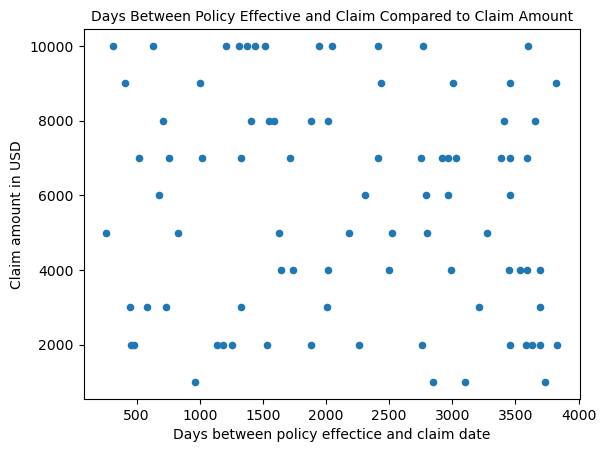

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data2=pd.read_csv('insurance_data.csv')
index2=data2['INSURANCE_TYPE']=='Motor'
data2=data2[index2]
index2=data2['CLAIM_STATUS']=='D'
data2=data2[index2]
data2=data2[['POLICY_EFF_DT','REPORT_DT','CLAIM_AMOUNT']]
time2=data2[['POLICY_EFF_DT','REPORT_DT']]=data2[['POLICY_EFF_DT','REPORT_DT']].applymap(np.array)

mark=0
for i in data2.REPORT_DT:
    date=i
    year=date[:4]
    month=date[5:7]
    day=date[8:10]
    year=(int(year)-2000)*365
    month=int(month)*30
    day=int(day)
    i=year+month+day
    data2.iloc[mark, 1] = i
    mark=mark+1
mark=0
for i in data2.POLICY_EFF_DT:
    date=i
    year=date[:4]
    month=date[5:7]
    day=date[8:10]
    year=(int(year)-2000)*365
    month=int(month)*30
    day=int(day)
    i=year+month+day
    data2.iloc[mark, 0] = i
    mark=mark+1
data2['Days'] = data2.REPORT_DT.sub(data2.POLICY_EFF_DT)
data2=data2[['Days','CLAIM_AMOUNT']]
dataplot2=pd.DataFrame(data2)
dataplot2.plot.scatter(x="Days",y="CLAIM_AMOUNT")
plt.ylabel("Claim amount in USD")
plt.xlabel("Days between policy effectice and claim date")
plt.title("Days Between Policy Effective and Claim Compared to Claim Amount", fontsize=10, loc='center')
plt.show()